In [1]:
import pandas as pd
df_mini = pd.read_csv('../input/aideas/texto_limpio.csv', index_col = 'Unnamed: 0')

import pickle
consolidated = pickle.load(open("../input/aideas/translation.pkl", "rb" ))

from sklearn.utils import shuffle
dataset = shuffle(df_mini, random_state=42).reset_index(drop=True)
dataset

,ticker,date,body,r_adj,label,texto_limpio
0,TEF,2021-11-21 11:42:00.000,El magistrado escuchará a varios imputados rel...,0.056964,1,magistrado escuchará varios imputados relacion...
1,ANA,2021-08-27 13:48:00.000,"SEVILLA, 27 Ago. (EUROPA PRESS) - La sección d...",0.012567,1,27 sección agrupación sindical conductores soc...
2,TEF,2021-01-26 18:37:52.000,El Ibex 35 ha regresado a las subidas y rozado...,0.032565,1,ibex 35 regresado subidas rozado cota puntos p...
3,NTGY,2021-01-26 09:16:00.000,"MADRID, 26 Ene. (EUROPA PRESS) - El Ibex 35 ha...",0.022345,1,26 ibex 35 iniciado sesión martes subida lleva...
4,ELE,2021-12-16 11:48:00.000,"Naturgy se sitúa en la plaza 39 MADRID, 16 Dic...",-0.012581,-1,naturgy sitúa plaza 39 16 acciona energía reva...
...,...,...,...,...,...,...
21336,FER,2021-06-07 11:41:00.000,"MADRID, 7 Jun. (EUROPA PRESS) - Adriano Care, ...",0.012905,1,7 adriano socimi orientada residencias anciano...
21337,TEF,2021-06-05 17:30:00.000,"PAMPLONA, 5 Jun. (EUROPA PRESS) - La Asociació...",0.012192,1,5 asociación consumidores navarra irache recib...
21338,ELE,2021-03-08 15:11:00.000,"GRANADA, 8 Mar. (EUROPA PRESS) - El incendio, ...",0.019342,1,8 pasado 27 centro transformación ubicado call...
21339,ELE,2021-01-10 21:33:08.000,Filomena deja en España ciudades incomunicadas...,-0.012100,-1,filomena deja españa ciudades incomunicadas ba...


In [2]:
# import pandas as pd
# df_mini = pd.read_csv('../texto_limpio.csv', index_col = 'Unnamed: 0')

# import pickle
# consolidated = pickle.load(open("../translation.pkl", "rb" ))

# from sklearn.utils import shuffle
# dataset = shuffle(df_mini, random_state=42).reset_index(drop=True)
# dataset

# Transfer Learning con FinBERT

A continuación se reentrena la última capa únicamente de FinBERT para la clasificación de las labels del dataset de noticias y alpha.

In [3]:
dataset.label = dataset.label.replace({-1:0})

In [4]:
from datasets import load_dataset
from transformers import AutoTokenizer, DataCollatorWithPadding
import numpy as np

checkpoint = "dccuchile/bert-base-spanish-wwm-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

Downloading:   0%|          | 0.00/310 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/650 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/242k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/475k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/134 [00:00<?, ?B/s]

In [5]:
from transformers import AutoModelForSequenceClassification, AutoConfig
import tensorflow as tf
import keras
from tensorflow.keras.optimizers import Adam
from transformers import AutoTokenizer, TFBertForSequenceClassification

model = TFBertForSequenceClassification.from_pretrained(checkpoint, num_labels=2)
# config = AutoConfig.from_pretrained("ProsusAI/finbert")
# config.num_labels = 2
# model = TFAutoModelForSequenceClassification.from_config(config)


Downloading:   0%|          | 0.00/512M [00:00<?, ?B/s]

2022-04-04 16:04:28.847441: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-04 16:04:28.848657: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-04 16:04:28.849514: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-04 16:04:28.850428: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [6]:
# from transformers import AutoModelForSequenceClassification, AutoConfig
# import tensorflow as tf
# import keras
# from tensorflow.keras.optimizers import Adam
# from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

# # model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert", num_labels=2)
# config = AutoConfig.from_pretrained("ProsusAI/finbert")
# config.num_labels = 2
# model = TFAutoModelForSequenceClassification.from_config(config)


In [7]:
# tokenizer = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-uncased")
# tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
# model = TFAutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert", from_pt=True, num_labels=1)

In [8]:
# import numpy as np
# proba_matrix = np.array(proba)
# dataset_preds["Finbert_TL_2label"] = proba_matrix.argmax(axis=1)

In [9]:
model.layers[0].trainable=False
# model.layers[-1].activation=keras.activations.softmax

In [10]:
model.compile(
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
optimizer=Adam(learning_rate=0.0001),
metrics=['accuracy']
)

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dataset.body, dataset.label, test_size=0.2, random_state=42)

In [12]:
# tokenized_datasets = tokenizer(dataset.body.tolist()[:5], padding=True, truncation=True, return_tensors="tf")
x_train = tokenizer(x_train.tolist(), padding="max_length", truncation=True, return_tensors="tf")

In [13]:
x_test = tokenizer(x_test.tolist(), padding="max_length", truncation=True, return_tensors="tf")

In [14]:
# tokens_w_labels = x_train.copy()

# train_dataset = tf.data.Dataset.from_tensor_slices((
#     dict(tokens_w_labels),
#     y_train.values[:5]
# ))

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint

filepath = './checkpoint'
model_checkpoint_callback = ModelCheckpoint(
    filepath=filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

hist = model.fit(
    dict(x_train),
    y_train,
    batch_size=128,
    epochs=20,
    validation_split=0.1,
    callbacks=[model_checkpoint_callback]
    )

2022-04-04 16:05:16.374129: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
121/121 [==============================] - 410s 3s/step - loss: 0.6966 - accuracy: 0.4956 - val_loss: 0.6941 - val_accuracy: 0.4918
Epoch 2/20
121/121 [==============================] - 391s 3s/step - loss: 0.6948 - accuracy: 0.4993 - val_loss: 0.6939 - val_accuracy: 0.4947
Epoch 3/20
121/121 [==============================] - 391s 3s/step - loss: 0.6941 - accuracy: 0.5101 - val_loss: 0.6938 - val_accuracy: 0.5059
Epoch 4/20
121/121 [==============================] - 391s 3s/step - loss: 0.6939 - accuracy: 0.5091 - val_loss: 0.6937 - val_accuracy: 0.5123
Epoch 5/20
121/121 [==============================] - 391s 3s/step - loss: 0.6935 - accuracy: 0.5133 - val_loss: 0.6936 - val_accuracy: 0.5094
Epoch 6/20
121/121 [==============================] - 391s 3s/step - loss: 0.6928 - accuracy: 0.5143 - val_loss: 0.6935 - val_accuracy: 0.5082
Epoch 7/20
121/121 [==============================] - 391s 3s/step - loss: 0.6927 - accuracy: 0.5155 - val_loss: 0.6947 - val_accuracy: 0.5123

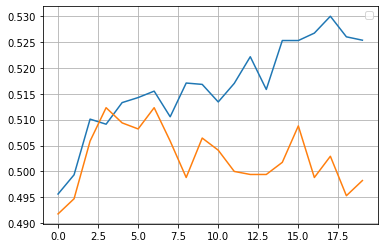

In [16]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.grid()
plt.show()

In [17]:
model.load_weights(filepath)
model.evaluate(x_test.data, y_test)

134/134 [==============================] - 89s 662ms/step - loss: 0.6939 - accuracy: 0.5137


[0.693880021572113, 0.513703465461731]

In [18]:
y_pred = model.predict(x_test.data)

In [19]:
from sklearn.metrics import (classification_report,
                             confusion_matrix,
                             roc_auc_score, precision_score)

In [20]:
y_pred = y_pred.logits.argmax(axis=1)

In [21]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.51      0.65      0.57      2149
           1       0.51      0.38      0.44      2120

    accuracy                           0.51      4269
   macro avg       0.51      0.51      0.50      4269
weighted avg       0.51      0.51      0.50      4269



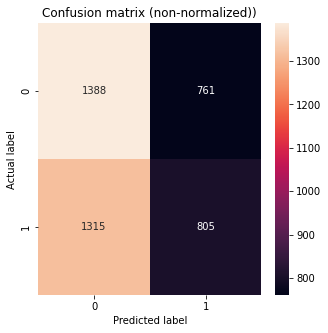

In [22]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title("Confusion matrix (non-normalized))")
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label")


plot_cm(y_test, y_pred)